# Package Demo

The **LoanClassifier** package is a tool designed to help financial analysts and data scientists predict whether a loan is likely to become 90-day delinquent. The package is particularly useful for:

1. **Testing Your Labelled Data**  
   Evaluate the performance of pre-trained models on datasets with known performance variables.
   
2. **Generating Predictions for Unlabelled Data**  
   Predict delinquency probabilities for datasets where performance variables are unknown.

This package utilizes four pre-trained models for predictions, all trained on [Fannie Mae's Single-Family Loan Performance Data from 2021](https://capitalmarkets.fanniemae.com/credit-risk-transfer/single-family-credit-risk-transfer/fannie-mae-single-family-loan-performance-data).
- **Linear SVM (Weight of Evidence - WoE)**: `Linear_SVM_WoE.pkl`
- **Linear SVM**: `Linear_SVM.pkl`
- **Logistic Regression (WoE)**: `Logistic_Regression_WoE.pkl`
- **XGBoost**: `XGBoost.pkl`

In [1]:
import loan_classifier

# Notebook Outline
1. Example Use on Labelled Data
2. Example Use on Unlabelled Data
3. Example Generated Warnings

# 1. Example Use on Labelled Data

In [13]:
classifier = loan_classifier.LoanClassifier(data_path="sample_labelled_data.csv", labelled=True)

/Users/melina/Documents/Uni/Fall 2024/MIE479/msf-capstone-crm/venv/lib/python3.12/site-packages/utils/non_woe_preparation.py:10: UserWarning: 
When testing on labelled data, dataset is filtered to include loans which match either of the following conditions: 
	 (i) Loan is 90 day deliquent or 
 	(ii) Loan is not 90 day deliquent but Ongoing.
Out of the provided dataset 10282 out of 10609 loans match this definition.
  warnings.warn("\nWhen testing on labelled data, dataset is filtered " +


In [3]:
# Evaluate all models
classifier.evaluate(models="all")

_Note_: Optionally set `models` to any of the following `["woe", "xgboost", "svm", "woe_lr", "woe_svm"]`, to only test on a subset of the data.

In [4]:
# Access classification metrics
classifier.classification_metrics

,Class,AUC,Accuracy,Recall,Precision,F1-Score
Model,,,,,,
Linear_SVM_WoE,0,0.734062,0.537639,0.537089,0.999093,0.698618
Linear_SVM_WoE,1,0.734062,0.537639,0.782609,0.003776,0.007516
Linear_SVM,0,0.799591,0.752286,0.752413,0.999094,0.858382
Linear_SVM,1,0.799591,0.752286,0.695652,0.006260,0.012408
Logistic_Regression_WoE,0,0.730722,0.490469,0.489619,0.999403,0.657246
Logistic_Regression_WoE,1,0.730722,0.490469,0.869565,0.003805,0.007577
XGBoost,0,0.749912,0.870648,0.871527,0.998660,0.930772
XGBoost,1,0.749912,0.870648,0.478261,0.008277,0.016272


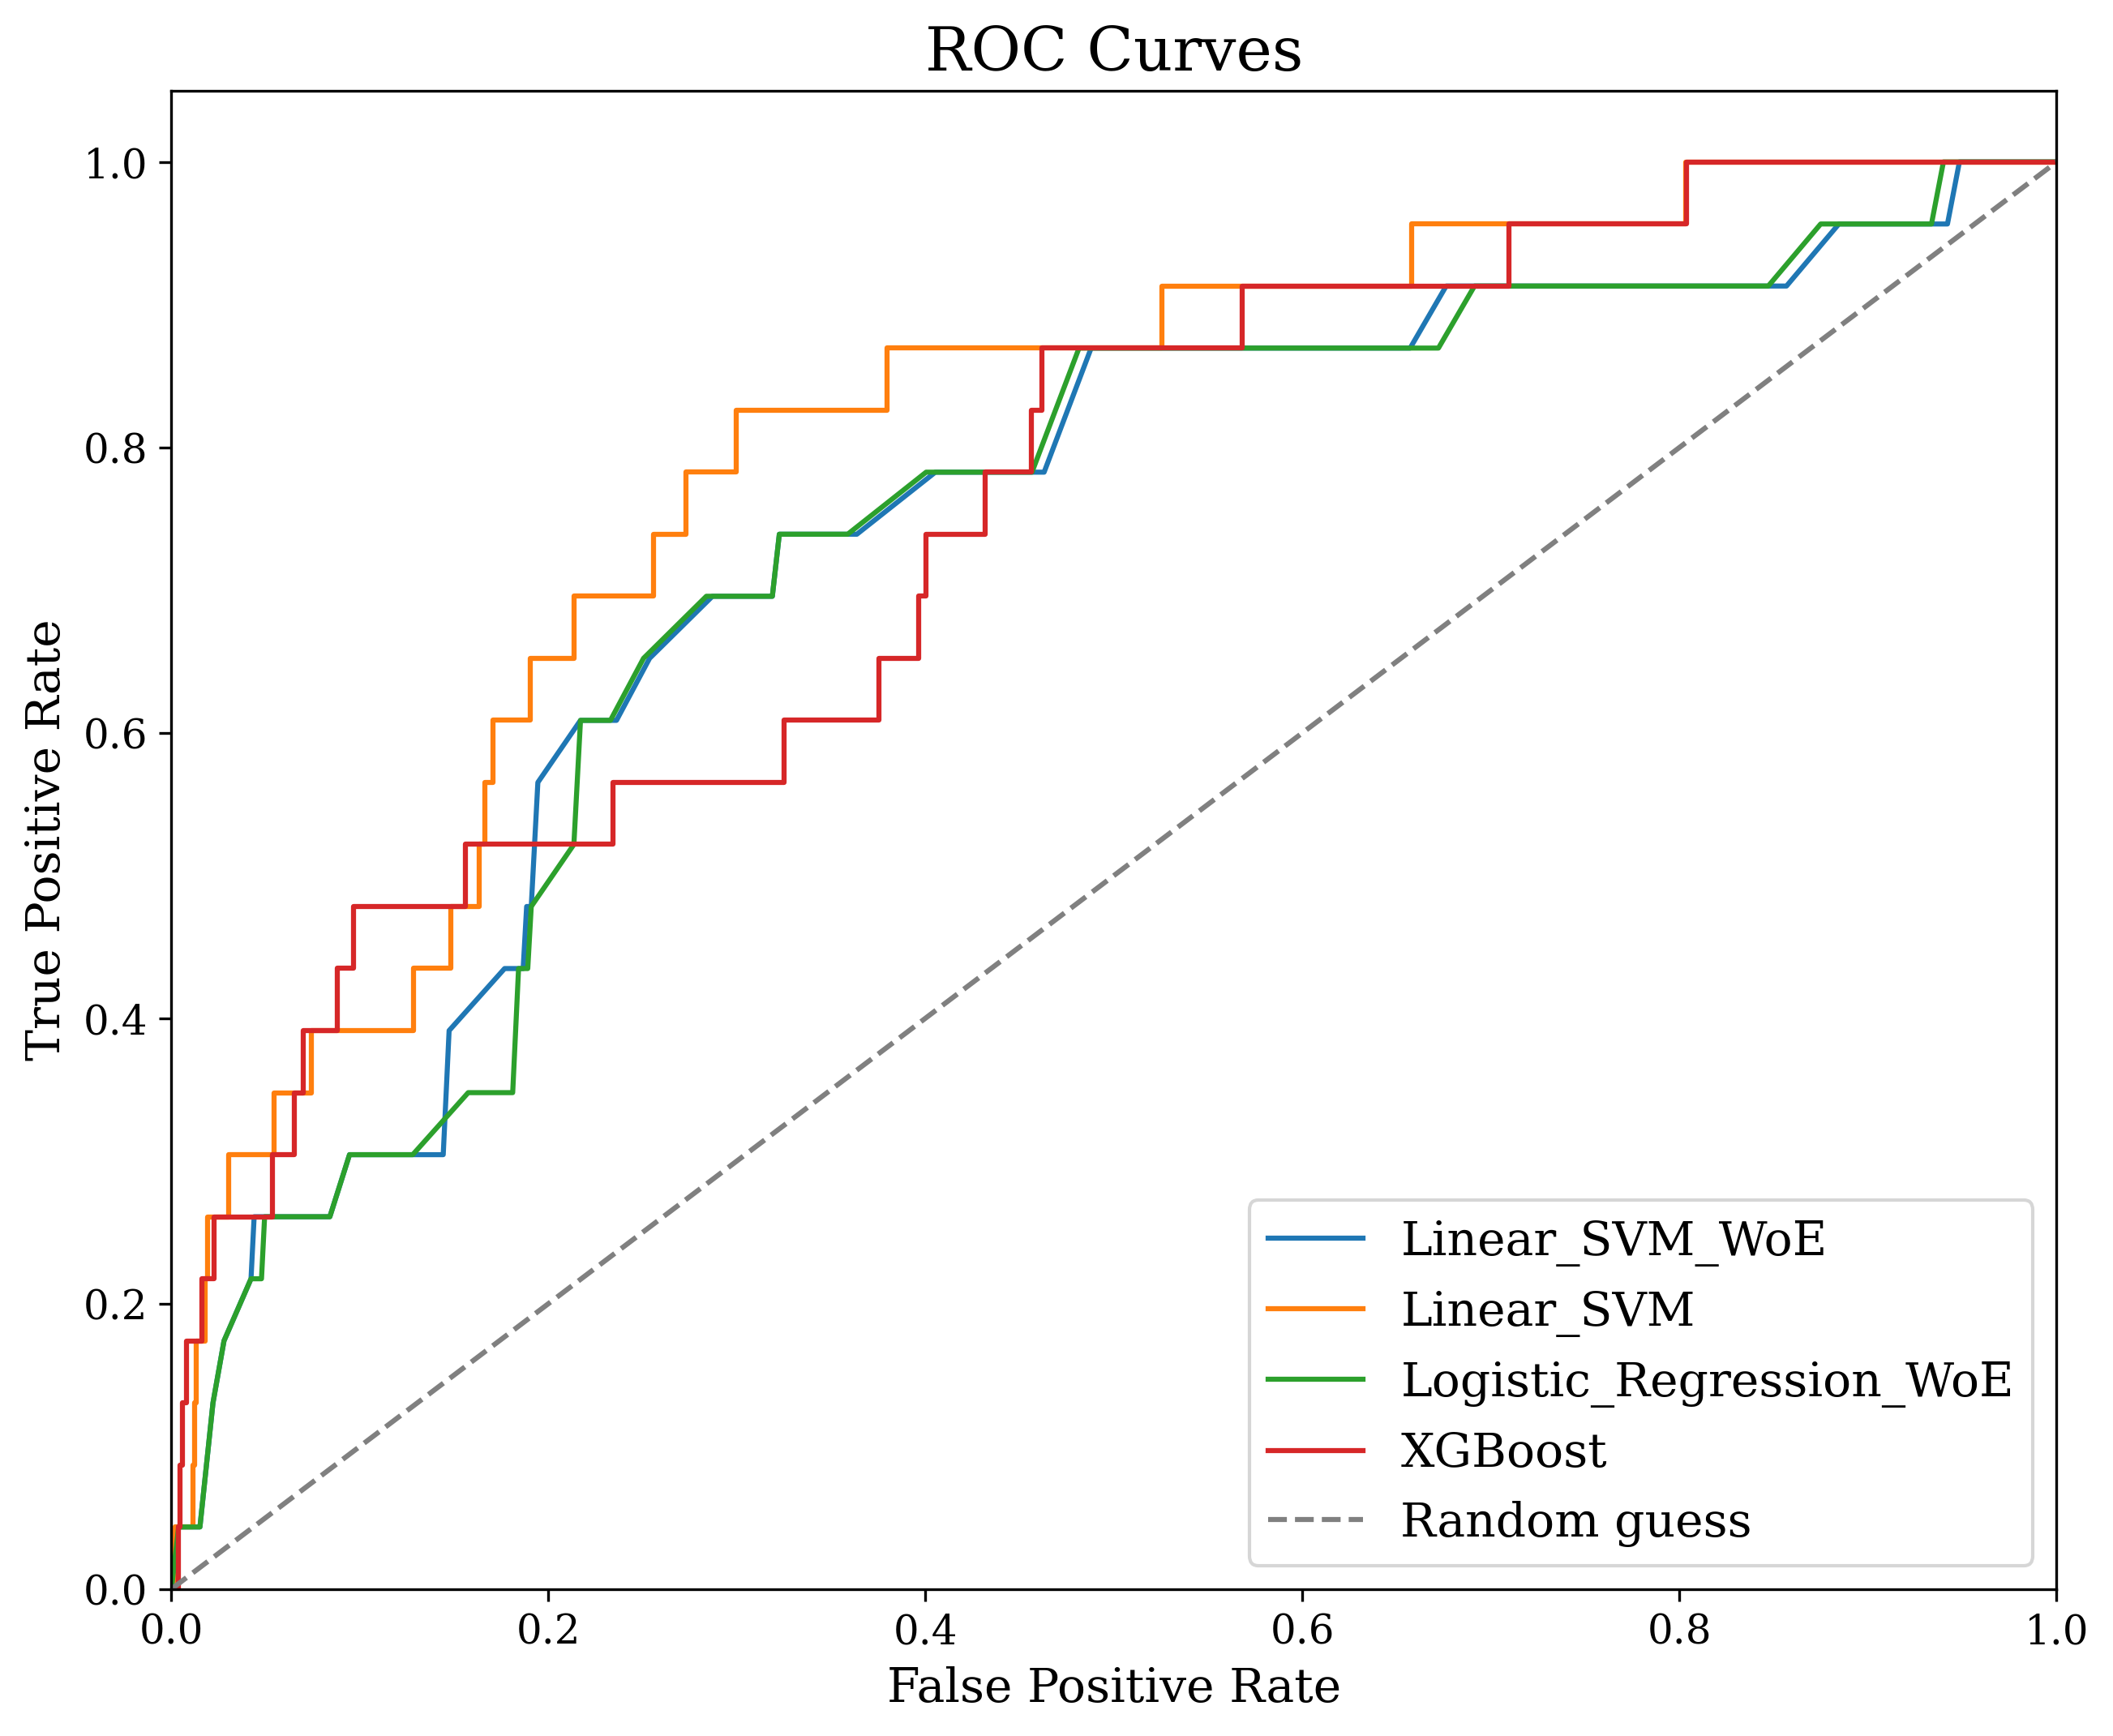

(<Figure size 3000x2400 with 1 Axes>,
 <Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

In [ ]:
# Plot the ROC curve - note curve here looks stepwise due to small sample
classifier.roc_curve

In [6]:
# Access predictions
classifier.predictions

,Linear_SVM_WoE_Predicted_Probabilities,Linear_SVM_WoE_Predicted_Classes,Linear_SVM_Predicted_Probabilities,Linear_SVM_Predicted_Classes,Logistic_Regression_WoE_Predicted_Probabilities,Logistic_Regression_WoE_Predicted_Classes,XGBoost_Predicted_Probabilities,XGBoost_Predicted_Classes
LOAN_ID,,,,,,,,
136518176,0.589880,1,0.496452,0,0.709996,1,0.521675,1
136518177,0.406822,0,0.291562,0,0.284975,0,0.108561,0
136518178,0.574048,1,0.512711,1,0.686573,1,0.350282,0
136518179,0.609398,1,0.472868,0,0.757196,1,0.326008,0
136518180,0.420066,0,0.368092,0,0.318703,0,0.080406,0
...,...,...,...,...,...,...,...,...
136528780,0.617347,1,0.474852,0,0.763584,1,0.356973,0
136528781,0.589880,1,0.508305,1,0.709996,1,0.527500,1
136528782,0.642555,1,0.613911,1,0.814457,1,0.549245,1


# 2. Example Use on Unlabelled Data

In [7]:
classifier = loan_classifier.LoanClassifier(data_path="unlabelled_sample_data.csv", labelled=False)


In [8]:
# Predict delinquency
classifier.evaluate()

In [9]:
# Access predictions
classifier.predictions

,Linear_SVM_WoE_Predicted_Probabilities,Linear_SVM_WoE_Predicted_Classes,Linear_SVM_Predicted_Probabilities,Linear_SVM_Predicted_Classes,Logistic_Regression_WoE_Predicted_Probabilities,Logistic_Regression_WoE_Predicted_Classes,XGBoost_Predicted_Probabilities,XGBoost_Predicted_Classes
LOAN_ID,,,,,,,,
135176712,0.386810,0,0.307648,0,0.245701,0,0.072627,0
135176713,0.488644,0,0.430928,0,0.463533,0,0.245902,0
135176714,0.411607,0,0.262869,0,0.299243,0,0.019266,0
135176715,0.463161,0,0.444852,0,0.420909,0,0.127010,0
135176716,0.624069,1,0.599200,1,0.766101,1,0.703464,1
...,...,...,...,...,...,...,...,...
135177206,0.641900,1,0.547645,1,0.806362,1,0.665803,1
135177207,0.594269,1,0.560626,1,0.710479,1,0.511810,1
135177208,0.355849,0,0.275668,0,0.191264,0,0.021503,0


In [10]:
# Report
classifier.classification_report

,Total Loans,Non-Default,Default,Default Percentage
Model,,,,
Linear_SVM_WoE,499,223,276,55.31
Linear_SVM,499,362,137,27.45
Logistic_Regression_WoE,499,206,293,58.72
XGBoost,499,438,61,12.22


In [11]:
# Save predictions
classifier.save_predictions(output_path="output.csv")

Predictions saved successfully to output.csv.


## 3. Example Generated Warnings
Here are some example warnings for improper library use.

In [12]:
initialized_classifier = loan_classifier.LoanClassifier(data_path="unlabelled_sample_data.csv", labelled=False)
# Attempting to access results prior to model evaluation
initialized_classifier.predictions

RuntimeError: Predictions are not available until models are evaluated.

In [ ]:
# Attempting to access results prior to model evaluation
initialized_classifier.classification_report

RuntimeError: Classification report is not available until models are evaluated.

In [ ]:
# Attempting to access labelled data features (ROC)
initialized_classifier.evaluate()
initialized_classifier.roc_curve

RuntimeError: ROC Curve is only available for labelled data, i.e. loan data with performance variables.

In [ ]:
# Attempting to access labelled data features (performance metrics)
initialized_classifier.classification_metrics

RuntimeError: Classification metrics are only available for labelled data, i.e. loan data with performance variables.